TRABAJO METODO

In [21]:
#paquetes
import pandas as pd 
import numpy as np  
import seaborn as sns   
import matplotlib.pylab as plt  
plt.style.use('ggplot')

In [22]:
#data
data = pd.read_excel('../trabajo maop/rosario f.xlsx')
data.head()

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013


In [23]:
#estructura de los datos
print(data.shape)
data.columns = [name.lower() for name in data.columns]
data.head()

(372, 8)


,interview__key,metodo,coord1__latitude,coord1__longitude,edad,genero,int de voto x espacio,radio
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013


In [24]:

# Cambiar nombre intencion
data.rename(columns={'int de voto x espacio': 'intencion'}, inplace=True)
print(data.columns)

Index(['interview__key', 'metodo', 'coord1__latitude', 'coord1__longitude',
       'edad', 'genero', 'intencion', 'radio'],
      dtype='object')


In [25]:
#missing values

data.isna().sum().reset_index()


,index,0
0,interview__key,0
1,metodo,0
2,coord1__latitude,0
3,coord1__longitude,0
4,edad,0
5,genero,0
6,intencion,0
7,radio,0


In [26]:
data.dtypes

interview__key        object
metodo                object
coord1__latitude     float64
coord1__longitude    float64
edad                  object
genero                object
intencion             object
radio                  int64
dtype: object

In [27]:
#nro de duplicados en la columna de interview key, que me parece que es la relevante.
data['interview__key'].duplicated().sum()

9

In [60]:
#frecuencias de valores únicos para las columnas categoricas
for col in ['metodo', 'edad', 'genero', 'intencion']:
    print(f"Frecuencias en la columna '{col}':")
    print(data[col].value_counts())
    print("-" * 40)  # Separador entre columnas


Frecuencias en la columna 'metodo':
metodo
IVR    271
F2F    101
Name: count, dtype: int64
----------------------------------------
Frecuencias en la columna 'edad':
edad
56 y mas    101
36 a 45      99
46 a 55      83
26 a 35      61
16 a 25      28
Name: count, dtype: int64
----------------------------------------
Frecuencias en la columna 'genero':
genero
Masculino    198
Femenino     165
Otro           9
Name: count, dtype: int64
----------------------------------------
Frecuencias en la columna 'intencion':
intencion
JxC               90
FdT               80
NINGUNO/NOSABE    72
LIBERTARIOS       57
OTROS             35
PNK               26
FIT               12
Name: count, dtype: int64
----------------------------------------


In [29]:
data['intencion'].value_counts()

intencion
JxC               90
FdT               80
NINGUNO/NOSABE    72
LIBERTARIOS       57
OTROS             35
PNK               26
FIT               12
Name: count, dtype: int64

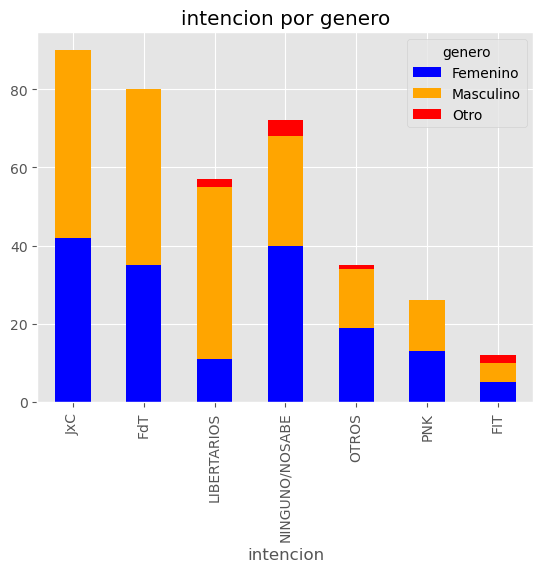

In [50]:
#grafico de barras intencion-genero, masculino
data.groupby(['intencion', 'genero']).size().unstack().sort_values(by='Masculino', ascending=False).plot(kind='bar', stacked=True, color=['blue', 'orange', 'red'])
plt.title('intencion por genero')
plt.show()

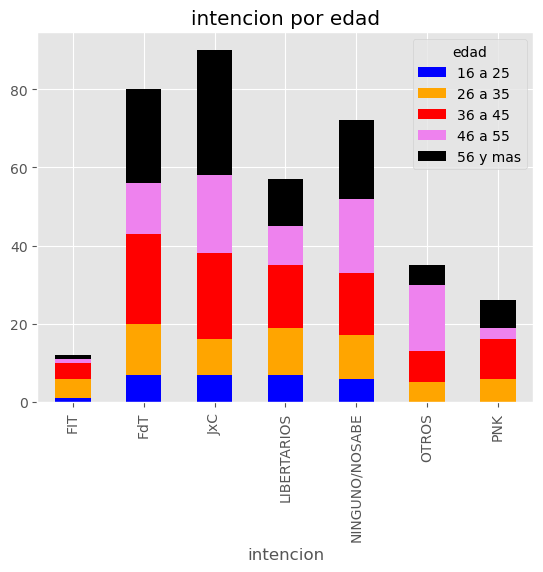

In [51]:
#grafico de barras intencion-edad
data.groupby(['intencion', 'edad']).size().unstack().plot(kind='bar', stacked=True, color=['blue', 'orange', 'red', 'violet', 'black'])
plt.title('intencion por edad')
plt.show()

In [33]:
# Convertir columnas categóricas a numéricas
for col in ['metodo', 'edad', 'genero', 'intencion']:
    data[f"{col}_cat"] = pd.factorize(data[col])[0]

# Verificar las nuevas columnas
print(data.head())

  interview__key metodo  coord1__latitude  coord1__longitude      edad  \
0    56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1    67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2    24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3    84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4    21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   

      genero       intencion      radio  metodo_cat  edad_cat  genero_cat  \
0  Masculino     LIBERTARIOS  820840409           0         0           0   
1  Masculino           OTROS  820840410           0         1           0   
2   Femenino           OTROS  820840502           0         0           1   
3  Masculino     LIBERTARIOS  820840502           0         2           0   
4   Femenino  NINGUNO/NOSABE  820841013           0         1           1   

   intencion_cat  
0              0  
1              1  
2              1  
3              0

In [34]:
data.head

<bound method NDFrame.head of     interview__key metodo  coord1__latitude  coord1__longitude      edad  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        genero       intencion      radio  metodo_cat  ed

In [35]:
# Crear el diccionario con las categorías y sus valores
categorias = {
    'edad': {0: '56 y mas', 1: '35 a 45', 2: '26 a 35', 3: '46 a 55', 4: '16 a 25'},
    'metodo': {0: 'F2F', 1: 'IVR'},
    'genero': {0: 'Masculino', 1: 'Femenino', 2: 'Otros'},
    'intencion': {0: 'LIBERTARIOS', 1: 'OTROS', 2: 'NINGUNO/NO SABE', 3: 'JXC', 4: 'FdT', 5: 'PNK', 6: 'FIT'}
}

# Convertir el diccionario a un DataFrame
categorias_df = pd.DataFrame([
    {'columna': col, 'numero': num, 'categoria': cat}
    for col, mapping in categorias.items()
    for num, cat in mapping.items()
])

# Mostrar el DataFrame resultante
print(categorias_df)


      columna  numero        categoria
0        edad       0         56 y mas
1        edad       1          35 a 45
2        edad       2          26 a 35
3        edad       3          46 a 55
4        edad       4          16 a 25
5      metodo       0              F2F
6      metodo       1              IVR
7      genero       0        Masculino
8      genero       1         Femenino
9      genero       2            Otros
10  intencion       0      LIBERTARIOS
11  intencion       1            OTROS
12  intencion       2  NINGUNO/NO SABE
13  intencion       3              JXC
14  intencion       4              FdT
15  intencion       5              PNK
16  intencion       6              FIT


In [36]:
data.dtypes

interview__key        object
metodo                object
coord1__latitude     float64
coord1__longitude    float64
edad                  object
genero                object
intencion             object
radio                  int64
metodo_cat             int64
edad_cat               int64
genero_cat             int64
intencion_cat          int64
dtype: object

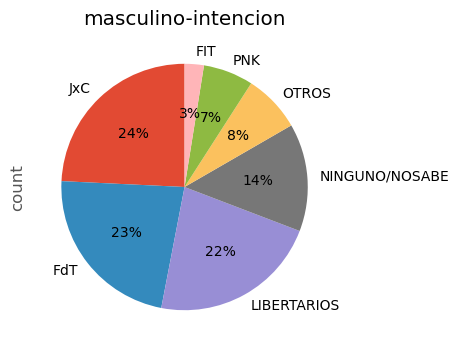

In [40]:
#piechart masculino-intencion
data[data['genero'] == 'Masculino']['intencion'].value_counts().plot(
    kind='pie', autopct='%1.0f%%', startangle=90, figsize=(4, 4)
)
plt.title('masculino-intencion')
plt.show()

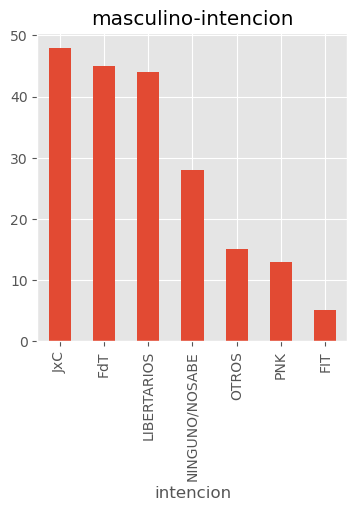

In [ ]:
#barplot masculino-intencion
data[data['genero'] == 'Masculino']['intencion'].value_counts().plot(
    kind='bar', figsize=(4, 4)
)
plt.title('masculino-intencion')
plt.show()

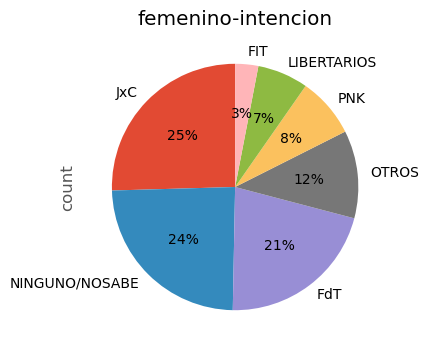

In [39]:
#piechart femenino-intencion
data[data['genero'] == 'Femenino']['intencion'].value_counts().plot(
    kind='pie', autopct='%1.0f%%', startangle=90, figsize=(4, 4)
)
plt.title('femenino-intencion')
plt.show()

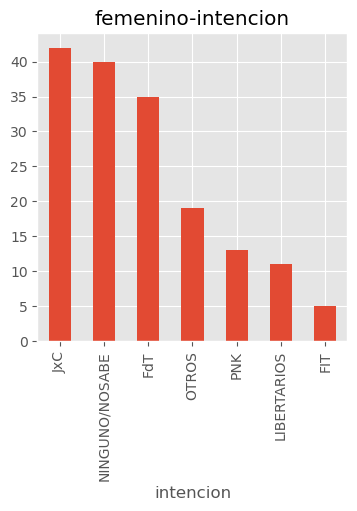

In [ ]:
#barplott masculino-intencion
data[data['genero'] == 'Femenino']['intencion'].value_counts().plot(
    kind='bar', figsize=(4, 4)
)
plt.title('femenino-intencion')
plt.show()

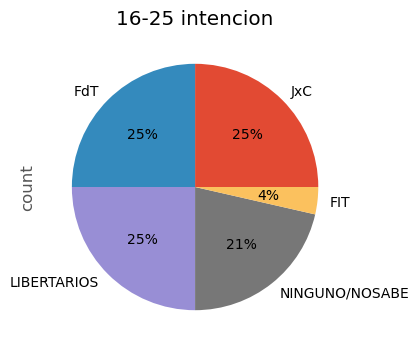

In [ ]:
#piechart edad-intencion 16-25
data[data['edad_cat'] == 4]['intencion'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4)) 
plt.title('16-25 intencion')
plt.show()

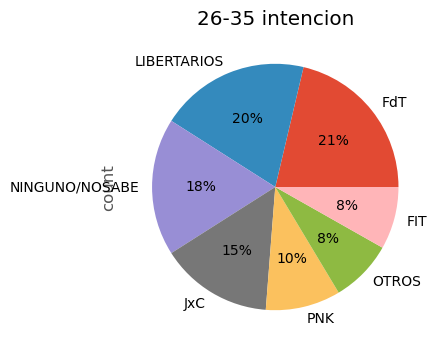

In [43]:
#piechart edad-intencion 26-35
data[data['edad_cat'] == 2]['intencion'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4)) 
plt.title('26-35 intencion')
plt.show()

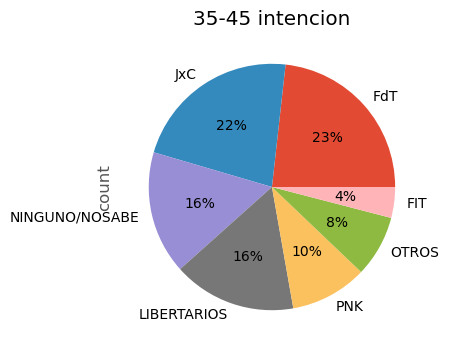

In [44]:
#piechart edad-intencion 35-45
data[data['edad_cat'] == 1]['intencion'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4)) 
plt.title('35-45 intencion')
plt.show()

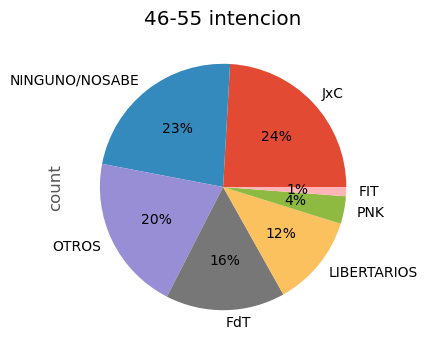

In [45]:
#piechart edad-intencion 46-55
data[data['edad_cat'] == 3]['intencion'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4)) 
plt.title('46-55 intencion')
plt.show()

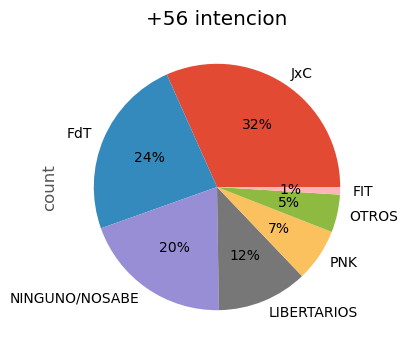

In [ ]:
#piechart edad-intencion +56
data[data['edad_cat'] == 0]['intencion'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4)) 
plt.title('+56 intencion')
plt.show()

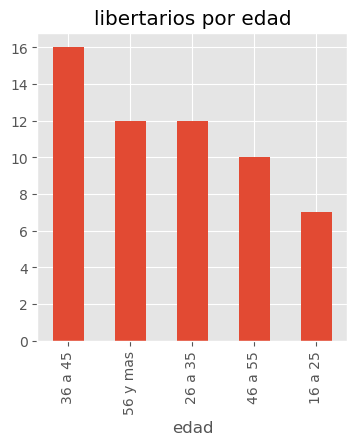

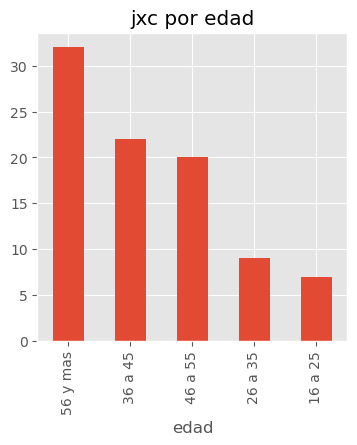

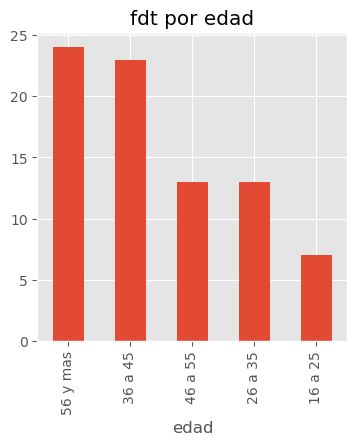

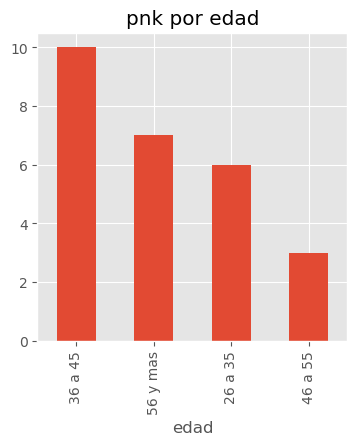

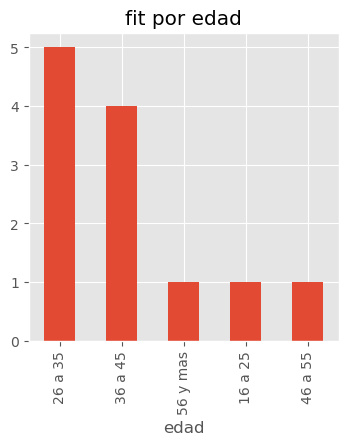

In [ ]:
#GRAFICOS PARTIDO-EDAD

#libertario por edad.
data[data['intencion_cat'] == 0]['edad'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('libertarios por edad')
plt.show()
#jxc por edad
data[data['intencion_cat'] == 3]['edad'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('jxc por edad')
plt.show()
#fdt por edad
data[data['intencion_cat'] == 4]['edad'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('fdt por edad')
plt.show()
#pnk por edad
data[data['intencion_cat'] == 5]['edad'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('pnk por edad')
plt.show()
#fit por edad
data[data['intencion_cat'] == 6]['edad'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('fit por edad')
plt.show()

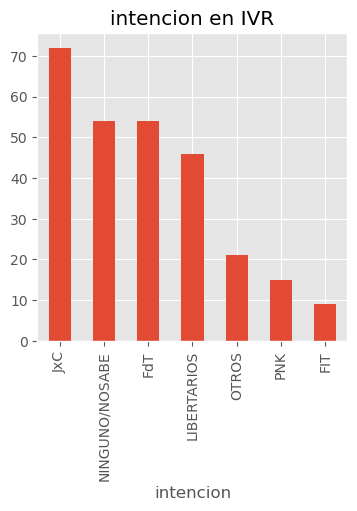

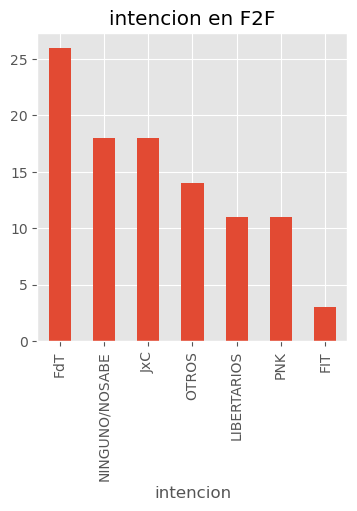

In [52]:
#visualizaciones metodo-intencion
data[data['metodo'] == 'IVR']['intencion'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('intencion en IVR')
plt.show()

data[data['metodo'] == 'F2F']['intencion'].value_counts().plot(kind='bar', figsize=(4,4))
plt.title('intencion en F2F')
plt.show()


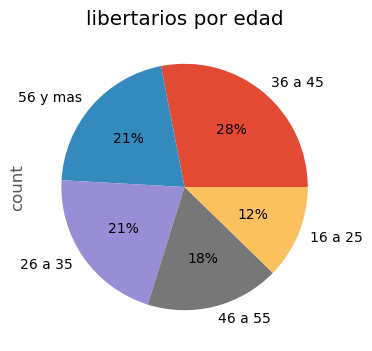

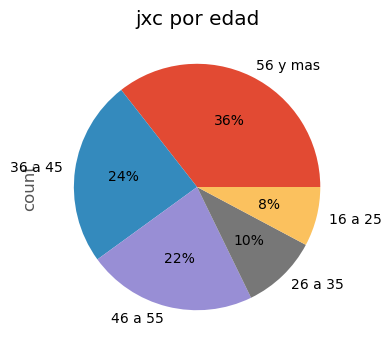

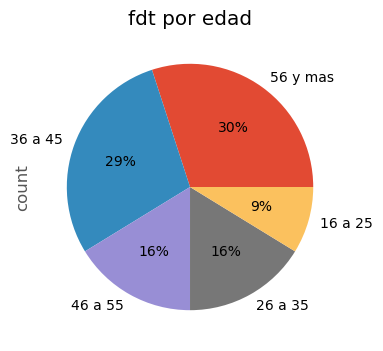

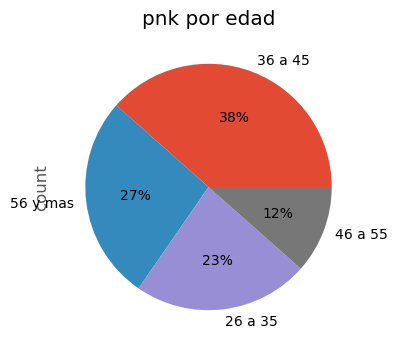

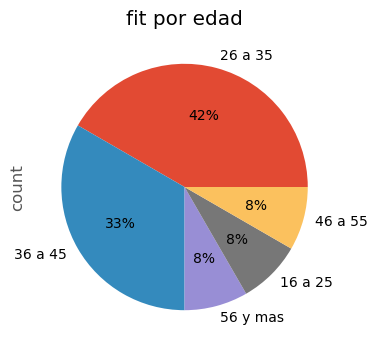

In [54]:
#GRAFICOS PARTIDO-EDAD PIECHARTS

#libertario por edad.
data[data['intencion_cat'] == 0]['edad'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title('libertarios por edad')
plt.show()
#jxc por edad
data[data['intencion_cat'] == 3]['edad'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title('jxc por edad')
plt.show()
#fdt por edad
data[data['intencion_cat'] == 4]['edad'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title('fdt por edad')
plt.show()
#pnk por edad
data[data['intencion_cat'] == 5]['edad'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title('pnk por edad')
plt.show()
#fit por edad
data[data['intencion_cat'] == 6]['edad'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title('fit por edad')
plt.show()

In [57]:
#viendo un poco el radio
data['radio'].unique

<bound method Series.unique of 0      820840409
1      820840410
2      820840502
3      820840502
4      820841013
         ...    
367    821190304
368    821190305
369    820843707
370    820280512
371    820842113
Name: radio, Length: 372, dtype: int64>